In [189]:
import pandas as pd 
import numpy as np 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

import math

import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
from datetime import timedelta


In [154]:
df_btc = pd.read_csv(r'../data/cryptoInd/btc_ind.csv')
close = df_btc['close']
df_btc.drop('close', axis = 1, inplace = True)
df_btc['close'] = close

In [208]:
df_btc.head(10)

,adj_close,low,high,open,volume,SMA30,CMA30,EMA30,adx,bb_low,...,macd,macdsignal,macdhist,rsi,stdev,slowk,slowd,dollar_close,sp500_close,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,31971.914062,28722.755859,33440.218750,32810.949219,81163475344,27298.853776,8146.272664,27934.579384,55.071930,20863.197808,...,3099.426762,2526.847766,572.578996,81.525571,3217.827984,73.101987,82.841404,89.845001,3700.649902,31971.914062
2021-01-05,33992.429688,30221.187500,34437.589844,31977.041016,67547324782,28044.810286,8165.403794,28691.810672,54.520369,21280.955721,...,3288.260017,2679.130216,609.129801,84.434084,3381.927283,74.392564,77.408578,89.408997,3726.860107,33992.429688
2021-01-06,36824.363281,33514.035156,36879.699219,34013.613281,75289433811,28914.232552,8186.601249,29708.379748,54.524805,21269.786557,...,3624.642484,2868.232670,756.409814,87.410495,3822.222998,82.566071,76.686874,89.501999,3748.139893,36824.363281
2021-01-07,39371.042969,36491.191406,40180.367188,36833.875000,84762141031,29989.545703,8209.649617,30916.212651,55.058503,21364.626875,...,4050.037469,3104.593630,945.443839,89.369083,4312.459414,93.929973,83.629536,89.791000,3803.790039,39371.042969
2021-01-08,40797.609375,36838.636719,41946.738281,39381.765625,88107519480,31126.989714,8233.717534,32151.387241,55.784314,21643.534912,...,4450.970033,3373.868910,1077.101123,90.276942,4741.727401,94.522746,90.339596,90.068001,3824.679932,40797.609375
2021-01-11,35566.656250,30549.599609,38346.531250,38346.531250,123320567399,33580.557813,8299.654522,34032.471366,52.331211,24416.513343,...,4338.167231,3935.160097,403.007134,65.863073,4582.022235,62.337596,76.792277,90.442001,3799.610107,35566.656250
2021-01-12,33922.960938,32697.976562,36568.527344,35516.359375,74773277909,34036.434635,8318.522936,34018.782563,49.442389,25555.412005,...,3922.051224,3932.538323,-10.487098,60.170859,4240.511315,43.680921,61.373143,90.064003,3801.189941,33922.960938
2021-01-13,37316.359375,32584.667969,37599.960938,33915.121094,69364315979,34700.029427,8339.860564,34430.979664,47.031533,26879.725238,...,3822.037120,3910.438082,-88.400962,66.562963,3910.152095,45.258182,50.425566,90.334000,3809.840088,37316.359375
2021-01-14,39187.328125,36868.562500,39966.406250,37325.109375,63615990033,35389.787760,8362.542525,35025.523222,45.380630,27942.015527,...,3849.373582,3898.225182,-48.851600,69.458494,3723.886117,57.071275,48.670126,90.214996,3795.540039,39187.328125


In [155]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['close'], name='BITCOIN', mode='lines',line=dict(color='red')))
fig2.show()

In [156]:
inicial_date = '2021-01-01'
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
inicial_date = pd.to_datetime(inicial_date)
df_btc = df_btc[df_btc['Date'] >= inicial_date]

# Scaling

In [157]:
df_btc.set_index('Date', inplace=True)
scaled_df = df_btc.copy()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_btc)
scaled_df = pd.DataFrame(scaled_feat, index = df_btc.index, columns=df_btc.columns)
scaled_df.head()

,adj_close,low,high,open,volume,SMA30,CMA30,EMA30,adx,bb_low,...,macd,macdsignal,macdhist,rsi,stdev,slowk,slowd,dollar_close,sp500_close,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.057325,0.000000,0.064421,0.079851,0.188256,0.000000,0.000000,0.000000,0.983637,0.000000,...,0.797512,0.776167,0.755741,0.868900,0.389211,0.743343,0.864693,0.035275,0.000000,0.057325
2021-01-05,0.110835,0.039789,0.090818,0.057763,0.147290,0.020445,0.001932,0.021119,0.970967,0.010708,...,0.816153,0.793294,0.767926,0.912471,0.414189,0.757507,0.802520,0.000000,0.023916,0.110835
2021-01-06,0.185835,0.127227,0.155452,0.111707,0.170583,0.044274,0.004074,0.049470,0.971069,0.010422,...,0.849359,0.814561,0.817022,0.957059,0.481209,0.847211,0.794260,0.007524,0.043334,0.185835
2021-01-07,0.253279,0.206282,0.242810,0.186409,0.199083,0.073747,0.006402,0.083156,0.983328,0.012853,...,0.891352,0.841143,0.880037,0.986400,0.555831,0.971930,0.873712,0.030906,0.094114,0.253279
2021-01-08,0.291060,0.215508,0.289559,0.253897,0.209148,0.104922,0.008833,0.117605,1.000000,0.020002,...,0.930931,0.871427,0.923925,1.000000,0.621172,0.978436,0.950503,0.053317,0.113175,0.291060


# Correlation Matrix

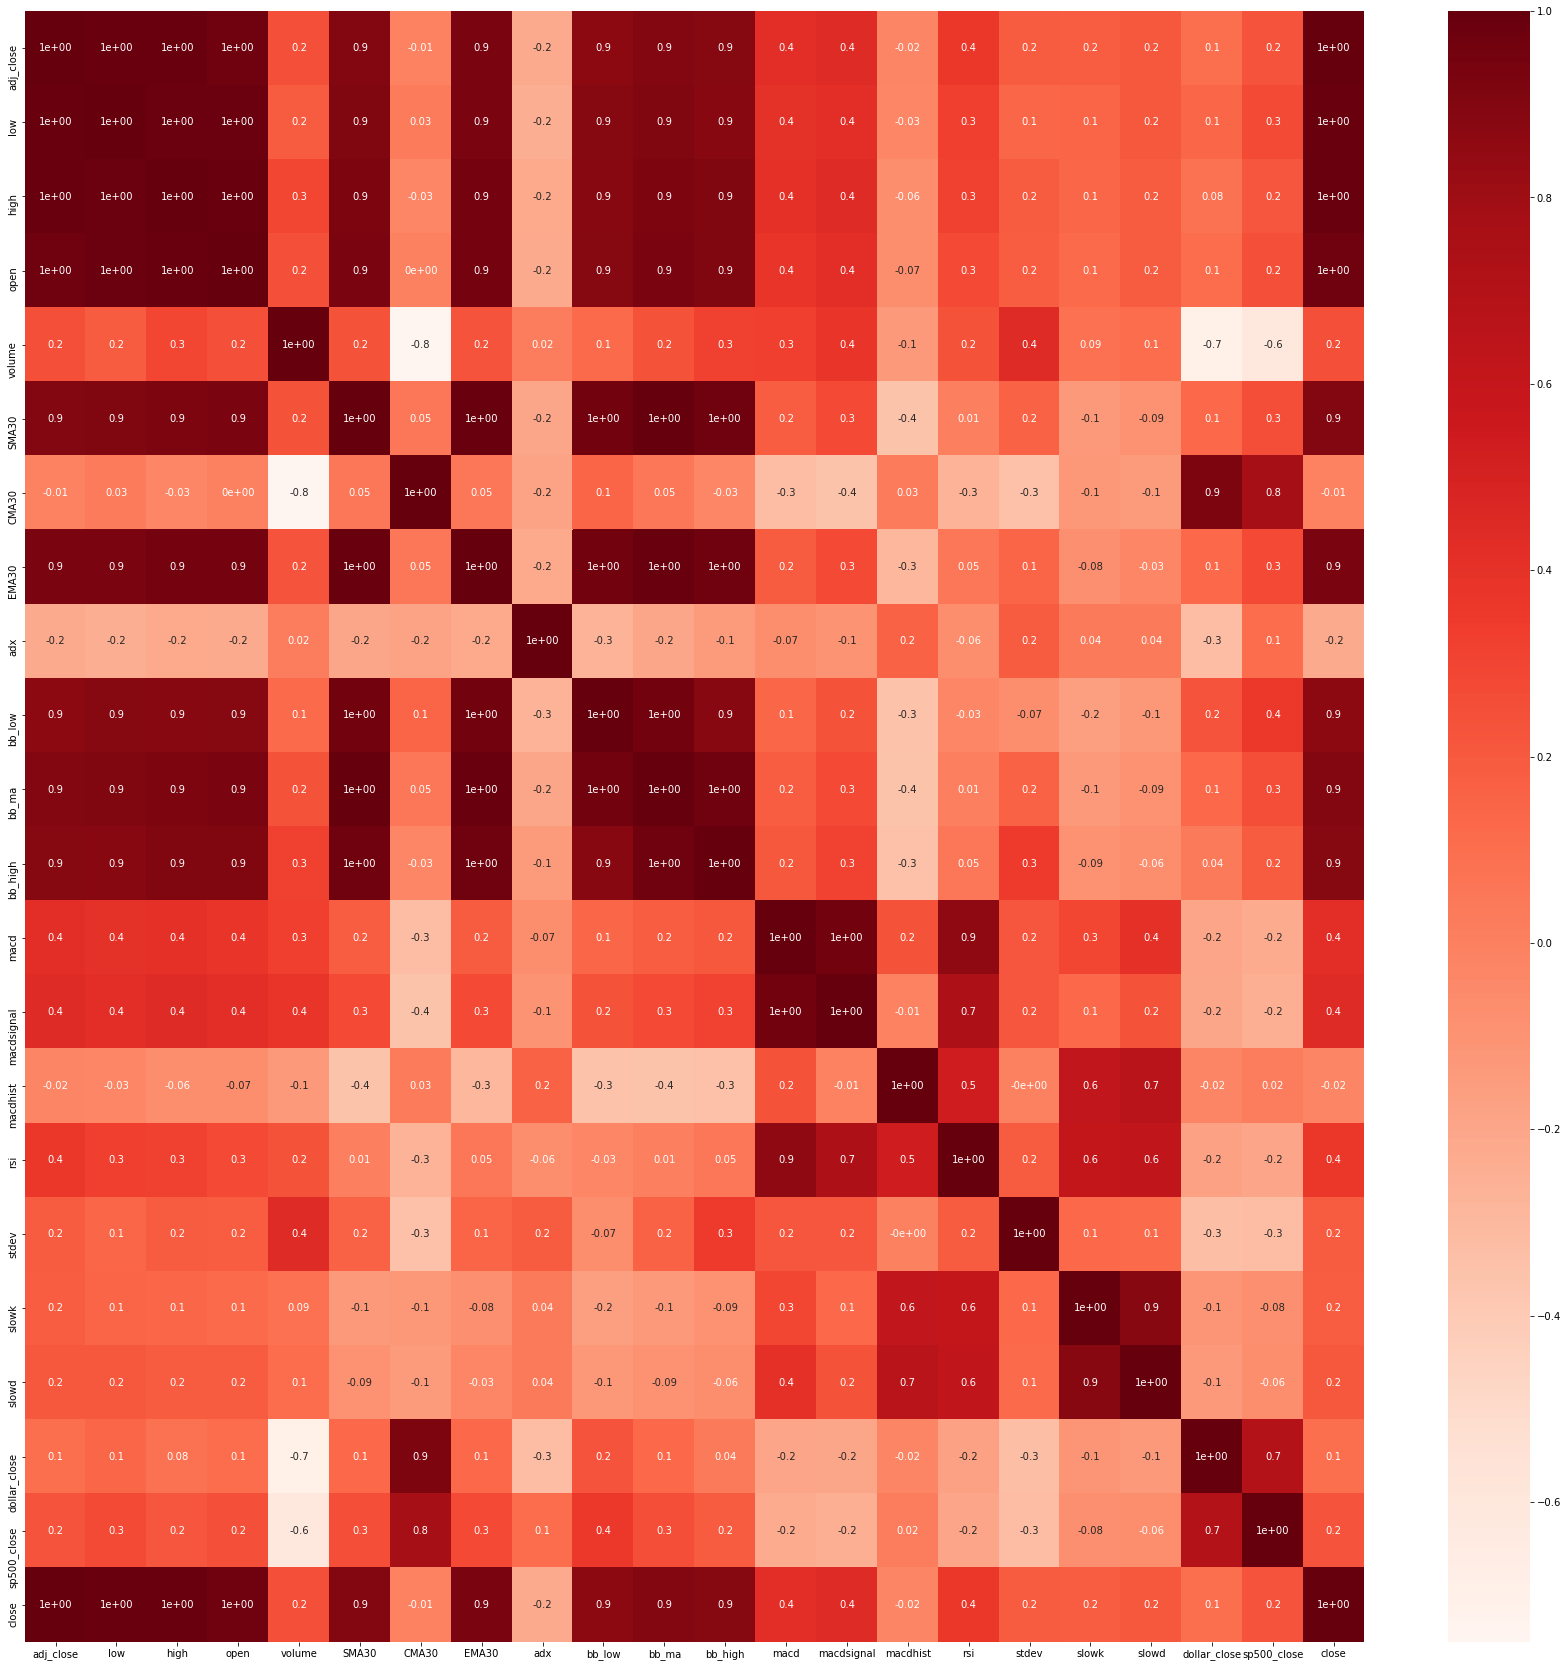

In [158]:
#Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(scaled_df.corr(method="spearman"), decimals=2)

def cor_heatmap(cor):
    plt.figure(figsize=(30,30))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()


cor_heatmap(corr)

In [159]:
scaled_df.columns

Index(['adj_close', 'low', 'high', 'open', 'volume', 'SMA30', 'CMA30', 'EMA30',
       'adx', 'bb_low', 'bb_ma', 'bb_high', 'macd', 'macdsignal', 'macdhist',
       'rsi', 'stdev', 'slowk', 'slowd', 'dollar_close', 'sp500_close',
       'close'],
      dtype='object')

In [160]:
scaled_df.drop(['low', 'high', 'open','SMA30','EMA30','bb_low',
 'bb_ma', 'bb_high', 'stdev', 'sp500_close'], axis=1, inplace=True)

## TimeBaseCV

In [161]:
import pandas as pd
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

# code from: https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8"

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='record_date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            #print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
            #      "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

# Models

## Function to Apply the Models

In [190]:
def add_days(df, forecast_length):
    end_point = len(df)
    df1 = pd.DataFrame(index=range(forecast_length), columns=range(2))
    df1.columns = ['close', 'Date']
    df = df.append(df1)
    df = df.reset_index(drop=True)
    x = df.at[end_point - 1, 'Date']
    x = pd.to_datetime(x, format='%Y-%m-%d')
    for i in range(forecast_length):
        df.at[df.index[end_point + i], 'Date'] = x + timedelta(days=1+i)
        df.at[df.index[end_point + i], 'close'] = 0
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.drop(['Date'], axis=1)
    return df

In [192]:
def randomForest(model,df1, forecast_length):
    df3 = df1[['close', 'Date']]
    df3 = add_days(df3, forecast_length)
    finaldf = df1.drop('Date', axis=1)
    finaldf = finaldf.reset_index(drop=True)
    end_point = len(finaldf)
    x = end_point - forecast_length
    finaldf_train = finaldf.loc[:x - 1, :]
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'close']
    finaldf_train_y = finaldf_train['close']

    print("Starting model train..")
    fit = model.fit(finaldf_train_x, finaldf_train_y)
    print("Model train completed..")
    print("Creating forecasted set..")
    yhat = []
    end_point = len(finaldf)
    df3_end = len(df3)
    for i in range(forecast_length, 0, -1):
        y = end_point - i
        inputfile = finaldf.loc[y:end_point, :]
        inputfile_x = inputfile.loc[:, inputfile.columns != 'close']
        pred_set = inputfile_x.head(1)
        pred = fit.predict(pred_set)
        df3.at[df3.index[df3_end - i], 'close'] = pred[0]
        finaldf = df1.drop('Date', axis=1)
        finaldf = finaldf.reset_index(drop=True)
        yhat.append(pred)
    yhat = np.array(yhat)
    print("Forecast complete..")
    return yhat

In [209]:
def show_results(df_results, df,objetive ='close',train_period_split=100,test_period_split=5, *args):
    #Scalling
    scaler = MinMaxScaler()
    scaled_feat = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_feat, index = df.index, columns=df.columns)

    X_scaled = scaled_df.drop(objetive, axis=1)
    y_scaled = scaled_df[objetive]

    X_tbcv = X_scaled.reset_index()
    y_scaled = y_scaled.reset_index()
    y_scaled['Date'] = pd.to_datetime(y_scaled['Date'], format='%Y-%m-%d')   
    X_tbcv['Date'] = pd.to_datetime(X_tbcv['Date'], format='%Y-%m-%d')                
    tscv = TimeBasedCV(train_period=train_period_split,
        test_period=test_period_split,
        freq='days')
    colours =['red', 'blue', 'yellow', 'pink']
    fig2 = go.Figure()
    count = 0
    for idx,arg in enumerate(args):
        for train_index, test_index in tscv.split(X_tbcv,date_column='Date',gap=2):
            X_train = X_tbcv.loc[train_index]
            y_train = y_scaled.loc[train_index]
            X_train['close'] = y_train['close']
            y_test  = y_scaled.loc[test_index]
            X_test = X_tbcv.loc[test_index]
            X_test.set_index('Date', inplace=True)
            y_test.set_index('Date', inplace=True)
            mae_list = []
            mse_list = []
            r2_list = []
            rmse_list = []

            y_pred_test = randomForest(model=arg,df1=X_train,forecast_length=test_period_split)
            # prints metric results         
            value_mae = mean_absolute_error(y_test, y_pred_test)
            value_mse = mean_squared_error(y_test, y_pred_test)
            value_r2 = r2_score(y_test, y_pred_test)
            value_rmse = math.sqrt(value_mse)
            #print(value_mae, value_mse, value_r2)
            # append the accuracies, the time and the number of iterations in the corresponding list
            mae_list.append(value_mae)
            mse_list.append(value_mse)
            r2_list.append(value_r2)
            rmse_list.append(value_rmse)

            real_name = 'real '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to "\
                + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
            pred_name = 'pred '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to"\
                + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
            X_train['close'] = y_train
            X_pred_test = X_test.copy()
            X_test['close'] = y_test
            X_pred_test['close'] = y_pred_test

            X_pred_test_undo = scaler.inverse_transform(X_pred_test)
            X_test_undo = scaler.inverse_transform(X_test)

            X_pred_test_graphic = pd.DataFrame(data = X_pred_test_undo, index = X_pred_test.index, columns=X_pred_test.columns)
            X_test_graphic = pd.DataFrame(data =X_test_undo, index = X_test.index, columns=X_test.columns)

            fig2.add_trace(go.Scatter(x=X_test_graphic.index, y=X_test_graphic['close'], name=real_name, mode='lines',line=dict(color='green')))
            fig2.add_trace(go.Scatter(x=X_pred_test_graphic.index, y=X_pred_test_graphic['close'], name=pred_name, mode='lines', line=dict(color=colours[idx])))

        fig2.update_layout(dict(updatemenus=[
                                dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                        dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                        ),
                                        dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                        )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                                ),
                        ]
                ))
        mae = round(np.mean(mae_list),10)
        mse = round(np.mean(mse_list),10)
        r2 = round(np.mean(r2_list),10)
        rmse = round(np.mean(rmse_list),10)
        df_results.iloc[count] = mae, mse,rmse, r2
        count+=1
    fig2.show()
    return df_results
        
    

In [163]:
def avg_score(model, X, splits,objetive = 'close',split_method = 'tscv', train_period_split = 30,test_period_split=7):
        #final dataset
        df=pd.DataFrame()

        #Scalling
        scaler = MinMaxScaler()
        scaled_feat = scaler.fit_transform(X)
        scaled_df = pd.DataFrame(scaled_feat, index = X.index, columns=X.columns)

        X_scaled = scaled_df.drop(objetive, axis=1)
        y_scaled = scaled_df[objetive]

        # create lists to store the results from the different models 
        mae_list = []
        mse_list = []
        r2_list = []
        rmse_list =[]
        flag = 0 # feat sel flag to not keep printing 
    
        if split_method == 'hmcv':
                X_tbcv = X_scaled.reset_index()
                y_scaled = y_scaled.reset_index()
                y_scaled['Date'] = pd.to_datetime(y_scaled['Date'], format='%Y-%m-%d')   
                X_tbcv['Date'] = pd.to_datetime(X_tbcv['Date'], format='%Y-%m-%d')                
                tscv = TimeBasedCV(train_period=train_period_split,
                        test_period=test_period_split,
                        freq='days')

                fig = make_subplots(rows=1, cols=1)
                fig2 = go.Figure()

                for train_index, test_index in tscv.split(X_tbcv,date_column='Date'):
                        X_train = X_tbcv.loc[train_index]
                        y_train = y_scaled.loc[train_index]
                        X_test  = X_tbcv.loc[test_index]
                        y_test  = y_scaled.loc[test_index]
                        X_train.set_index('Date', inplace=True) 
                        y_train.set_index('Date', inplace=True)             
                        X_test.set_index('Date', inplace=True)
                        y_test.set_index('Date', inplace=True)


                        # applies the model 
                        model_fit = model.fit(X_train, y_train)
                        #predicts validation 
                        y_pred_test = model_fit.predict(X_test)
                
                        # prints metric results         
                        value_mae = mean_absolute_error(y_test, y_pred_test)
                        value_mse = mean_squared_error(y_test, y_pred_test)
                        value_rmse = math.sqrt(value_mse)
                        value_r2 = r2_score(y_test, y_pred_test)
                        # append the accuracies, the time and the number of iterations in the corresponding list
                        mae_list.append(value_mae)
                        mse_list.append(value_mse)
                        r2_list.append(value_r2)
                        rmse_list.append(value_rmse)
              

                
                        real_name = 'real '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to "\
                                   + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
                        pred_name = 'pred '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to"\
                                   + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)+" "

                        X_train['close'] = y_train
                        X_pred_test = X_test.copy()
                        X_test['close'] = y_test
                        X_pred_test['close'] = y_pred_test

                        X_pred_test_undo = scaler.inverse_transform(X_pred_test)
                        X_test_undo = scaler.inverse_transform(X_test)

                        X_pred_test_graphic = pd.DataFrame(data = X_pred_test_undo, index = X_pred_test.index, columns=X_pred_test.columns)
                        X_test_graphic = pd.DataFrame(data =X_test_undo, index = X_test.index, columns=X_test.columns)

                        fig2.add_trace(go.Scatter(x=X_test_graphic.index, y=X_test_graphic['close'], name=real_name, mode='lines',line=dict(color='green')))
                        fig2.add_trace(go.Scatter(x=X_pred_test_graphic.index, y=X_pred_test_graphic['close'], name=pred_name, mode='lines', line=dict(color='red')))
                        
                        #df.append(y_pred_test)
                
                model_name = str(model)+"Number of Splits: "+ str(tscv.get_n_splits())
        
                fig2.update_layout(dict(updatemenus=[
                                dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                        dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                        ),
                                        dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                        )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                                ),
                        ]
                ))

                fig2.update_layout(height=1000, width=1000,
                title_text=model_name)
                fig2.show()     


        
        elif split_method == 'tscv':
                fig = make_subplots(rows=splits, cols=1)
                #Splitting to Training set and Test set
                timesplit= TimeSeriesSplit(n_splits=splits)
                flag = 1
                for train_index, test_index in timesplit.split(X):
                        X_train, X_val = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
                        y_train, y_val = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
                        # applies the model 
                        model_fit = model.fit(X_train, y_train)
                        #predicts validation 
                        y_pred_val = model_fit.predict(X_val)
                
                        # prints metric results         
                        #metrics(X_train, X_val, y_train, y_pred_train, y_val, y_pred_val, model)
                        value_mae = mean_absolute_error(y_val, y_pred_val)
                        value_mse = mean_squared_error(y_val, y_pred_val)
                        value_r2 = r2_score(y_val, y_pred_val)
                        print(value_r2)
                        # append the accuracies, the time and the number of iterations in the corresponding list
                        mae_list.append(value_mae)
                        mse_list.append(value_mse)
                        r2_list.append(value_r2)

                
                        title_y = "Value from "+str(X_val.index.min())+" to "+str(X_val.index.max())
                        
                        fig.add_trace(go.Scatter(x=X_val.index, y=y_val, name='real', mode='lines', line=dict(color="#0000ff")),
                        row=flag,col=1)
                        fig.add_trace(go.Scatter(x=X_val.index, y=y_pred_val, name='prediction', mode='lines', line=dict(color="#0000ff")),
                        row=flag,col=1)
                        fig.update_xaxes(title_text= title_y, row=flag, col=1, title_font_size=10)
                        
                        flag+=1
                        
                model_name = str(rf_se)

                fig.update_layout(height=1000, width=1000,
                        title_text=model_name)
                fig.show()

        
        
  
        avg_mae = round(np.mean(mae_list),3)
        std_mae = round(np.std(mae_list),2)
        avg_mse = round(np.mean(mse_list),3)
        std_mse = round(np.std(mse_list),2)
        avg_rmse = round(np.mean(rmse_list),3)
        std_rmse = round(np.std(rmse_list),2)
        avg_r2 = round(np.mean(r2_list),3)
        std_r2 = round(np.std(r2_list),2)

        print(str(avg_mae) + '+/-' + str(std_mae),str(avg_rmse) + '+/-' + str(std_rmse),\
            str(avg_mse) + '+/-' + str(std_mse) , str(avg_r2) + '+/-' + str(std_r2) )
        return df

## Random Forest

In [164]:
rf_se = RandomForestRegressor(random_state=10,criterion='mse')
rf_ae = RandomForestRegressor(random_state=10,criterion='mae')
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['mse','mae'])
show_results(df, df_btc,'close',100,5, rf_se, rf_ae)

,MAE,MSE,RMSE,R2
mse,0.003034,0.000013,0.00357,0.964016
mae,0.001354,0.000002,0.001494,0.993698


In [165]:
rf_5 = RandomForestRegressor(random_state=10,criterion='mse', max_depth=5)
rf_20 = RandomForestRegressor(random_state=10,criterion='mse', max_depth=20)
rf_50 = RandomForestRegressor(random_state=10,criterion='mse', max_depth=50)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['5','20', '50'])
show_results(df, df_btc,'close',100,5,rf_5, rf_20,rf_50)

,MAE,MSE,RMSE,R2
5,0.002659,0.00001,0.003169,0.971652
20,0.003034,0.000013,0.00357,0.964016
50,0.003034,0.000013,0.00357,0.964016


In [166]:
rf_auto = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='auto')
rf_sqrt = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt')
rf_log2 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20,max_features='log2' )
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['auto','sqrt', 'log2'])
show_results(df, df_btc,'close',100,5,rf_auto, rf_sqrt,rf_log2)

,MAE,MSE,RMSE,R2
auto,0.001354,0.000002,0.001494,0.993698
sqrt,0.008364,0.000075,0.008652,0.788691
log2,0.008364,0.000075,0.008652,0.788691


In [167]:
rf_10 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt', n_estimators=50)
rf_20 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt',n_estimators=100)
rf_30 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20,max_features='sqrt', n_estimators=150)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['50','100', '150'])
show_results(df, df_btc,'close',100,5,rf_10, rf_20,rf_30)

,MAE,MSE,RMSE,R2
50,0.007587,0.000061,0.007782,0.829063
100,0.008364,0.000075,0.008652,0.788691
150,0.007067,0.000058,0.007615,0.83632


In [223]:
df_btc = read_csv(r'../data/cryptocsv/btc.csv')
df_btc = df_btc[['high','volume','Date', 'close']]

In [224]:
#df_btc.drop('Unnamed: 0',axis =1,inplace=True)

In [225]:
inicial_date = '2021-01-01'
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
inicial_date = pd.to_datetime(inicial_date)
df_btc = df_btc[df_btc['Date'] >= inicial_date]
df_btc.set_index('Date',inplace=True)

In [226]:
rf_final = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt', n_estimators=50)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['final'])
show_results(df, df_btc,'close',100,5, rf_final)

Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..
5 5 100 100 5
Starting model train..
Model train co

,MAE,MSE,RMSE,R2
final,0.025499,0.001095,0.033094,-2.951267


In [180]:
len(trainy),len(trainX),len(values),len(row)

(229, 229, 330, 2200)

In [183]:
values

array([[31971.9140625 , 28722.75585938, 33440.21875   , ...,
           89.84500122,  3700.64990234, 31971.9140625 ],
       [33992.4296875 , 30221.1875    , 34437.58984375, ...,
           89.40899658,  3726.86010742, 33992.4296875 ],
       [36824.36328125, 33514.03515625, 36879.69921875, ...,
           89.5019989 ,  3748.13989258, 36824.36328125],
       ...,
       [40527.36328125, 40063.828125  , 42893.58203125, ...,
          100.61399841,  4393.66015625, 40527.36328125],
       [39740.3203125 , 39315.41796875, 40777.7578125 , ...,
          101.21299744,  4271.77978516, 39740.3203125 ],
       [40458.30859375, 38338.37890625, 40491.75390625, ...,
          101.76899719,  4296.12011719, 40458.30859375]])

In [184]:
df_btc.shift(1)

,adj_close,low,high,open,volume,SMA30,CMA30,EMA30,adx,bb_low,...,macd,macdsignal,macdhist,rsi,stdev,slowk,slowd,dollar_close,sp500_close,close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,31971.914062,28722.755859,33440.218750,32810.949219,8.116348e+10,27298.853776,8146.272664,27934.579384,55.071930,20863.197808,...,3099.426762,2526.847766,572.578996,81.525571,3217.827984,73.101987,82.841404,89.845001,3700.649902,31971.914062
2021-01-06,33992.429688,30221.187500,34437.589844,31977.041016,6.754732e+10,28044.810286,8165.403794,28691.810672,54.520369,21280.955721,...,3288.260017,2679.130216,609.129801,84.434084,3381.927283,74.392564,77.408578,89.408997,3726.860107,33992.429688
2021-01-07,36824.363281,33514.035156,36879.699219,34013.613281,7.528943e+10,28914.232552,8186.601249,29708.379748,54.524805,21269.786557,...,3624.642484,2868.232670,756.409814,87.410495,3822.222998,82.566071,76.686874,89.501999,3748.139893,36824.363281
2021-01-08,39371.042969,36491.191406,40180.367188,36833.875000,8.476214e+10,29989.545703,8209.649617,30916.212651,55.058503,21364.626875,...,4050.037469,3104.593630,945.443839,89.369083,4312.459414,93.929973,83.629536,89.791000,3803.790039,39371.042969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-19,40826.214844,38696.191406,40986.320312,39721.203125,3.370518e+10,41895.945052,17960.205603,41590.428227,18.373785,37762.284119,...,-846.042925,-432.495328,-413.547597,44.681840,2066.830466,44.258711,36.653573,100.765999,4391.689941,40826.214844
2022-04-20,41502.750000,40618.632812,41672.960938,40828.175781,2.530321e+10,41554.616667,17973.141067,41579.468449,18.379990,38282.843830,...,-765.946874,-499.185637,-266.761237,47.477342,1635.886419,58.945387,44.862682,100.963997,4462.209961,41502.750000
2022-04-21,41374.378906,40961.097656,42126.300781,41501.746094,2.781953e+10,41275.842448,17985.991829,41553.832256,18.017907,38799.413878,...,-704.705248,-540.289559,-164.415688,46.994529,1238.214285,83.222506,62.142201,100.417000,4459.450195,41374.378906


In [185]:
train

array([[31971.9140625 , 28722.75585938, 33440.21875   , ...,
           89.99299622,  4204.10986328, 35697.60546875],
       [33992.4296875 , 30221.1875    , 34437.58984375, ...,
           89.81900024,  4202.04003906, 36684.92578125],
       [36824.36328125, 33514.03515625, 36879.69921875, ...,
           89.90100098,  4208.12011719, 37575.1796875 ],
       ...,
       [56280.42578125, 55964.22265625, 57803.06640625, ...,
          100.61399841,  4393.66015625, 40527.36328125],
       [53569.765625  , 53569.765625  , 59183.48046875, ...,
          101.21299744,  4271.77978516, 39740.3203125 ],
       [57806.56640625, 56792.52734375, 58872.87890625, ...,
          101.76899719,  4296.12011719, 40458.30859375]])

In [182]:
# finalize model and make a prediction for monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

series = df_btc.copy()
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=100, n_out=2)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
model = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt', n_estimators=50)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-100:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))



ValueError: X has 44 features, but DecisionTreeRegressor is expecting 2243 features as input.

In [187]:
# finalize model and make a prediction for monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# load the dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Input: [34 37 52 48 55 50], Predicted: 42.900


In [151]:
rf_final = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20, max_features='sqrt', n_estimators=50)
avg_score(rf_final, df_btc, 5,'close', 'hmcv', train_period_split=100, test_period_split=5)

0.041+/-0.04 0.047+/-0.04 0.004+/-0.01 -5.86+/-14.74


""


## Gradient Boost

In [152]:
gb_mae = GradientBoostingRegressor(random_state = 10 , criterion='mae', n_estimators = 130)
gb_mse = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 130)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['mae','mse'])
show_results(df, train_3, test_3, y_train_3, y_test_3,gb_mae, gb_mse)

TypeError: unsupported type for timedelta days component: Series

In [ ]:
gb_50 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50)
gb_100 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100)
gb_150 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 150)
df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['50','100', '150'])
show_results(df, train_3, test_3, y_train_3, y_test_3,gb_50, gb_100, gb_150)

In [ ]:
gb_auto = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50, max_features=  'auto' )
gb_sqrt = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50, max_features = 'sqrt')
gb_log2 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50, max_features=  'log2')
df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['auto','sqrt', 'log2'])
show_results(df, train_3, test_3, y_train_3, y_test_3,gb_auto, gb_sqrt, gb_log2)

In [ ]:
gb_final = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50, max_features=  'log2')
y = df_btc['close']
X = scaled_df.drop(['close'], axis=1)
avg_score(gb_final, X, y,5, 'hmcv', train_period_split=100, test_period_split=5)

# Neural Nerworks

In [ ]:
nn_2525 = MLPRegressor(hidden_layer_sizes=(25,25), random_state=15,max_iter = 3000)
nn_10101010 = MLPRegressor(hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_10 = MLPRegressor(hidden_layer_sizes=(10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['2525','101010', '10'])
show_results(df, X_train_cv, X_test_cv, y_train_cv, y_test_cv,nn_2525, nn_10101010, nn_10)

In [ ]:
nn_identity = MLPRegressor(activation = 'identity',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_logistic = MLPRegressor(activation = 'logistic',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_tanh = MLPRegressor(activation = 'tanh',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_relu = MLPRegressor(activation = 'relu',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['identity','logistic', 'tanh', 'relu'])
show_results(df, X_train_cv, X_test_cv, y_train_cv, y_test_cv,nn_identity, nn_logistic, nn_tanh, nn_relu)

In [ ]:
nn_lbfgs = MLPRegressor(solver = 'lbfgs', activation = 'relu',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_sgd = MLPRegressor(solver = 'sgd', activation = 'relu',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_adam = MLPRegressor(solver = 'adam', activation = 'relu',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['lbfgs','sgd', 'adam'])
show_results(df, X_train_cv, X_test_cv, y_train_cv, y_test_cv,nn_lbfgs, nn_sgd, nn_adam)

In [ ]:
nn_constant = MLPRegressor(learning_rate = 'constant',solver = 'adam', activation = 'relu',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_invscaling = MLPRegressor(learning_rate = 'invscaling',solver = 'adam', activation = 'relu',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_adaptive = MLPRegressor(learning_rate = 'adaptive',solver = 'adam', activation = 'relu',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'R2'], index = ['constant','invscaling', 'nn_adaptive'])
show_results(df, X_train_cv, X_test_cv, y_train_cv, y_test_cv,nn_constant, nn_invscaling, nn_adam)

In [ ]:
scaled_df

In [ ]:
nn_final = MLPRegressor(random_state=15, max_iter= 3000, hidden_layer_sizes=(10,10,10,10), activation='relu', solver = 'adam')
final_df = avg_score(nn_final, df_btc,5,'close', 'hmcv', train_period_split=100, test_period_split=5)

# Teste

In [ ]:
y_teste = scaled_df['close']
X_teste = scaled_df.drop('close', axis = 1)


In [ ]:
X_teste

In [ ]:
#df_btc.set_index('Date', inplace=True)
scaled_df = df_btc.copy()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_btc)
scaled_df = pd.DataFrame(scaled_feat, index = df_btc.index, columns=df_btc.columns)
scaled_df.size

In [ ]:
train = scaled_df.head(300)
test = scaled_df.tail(30)

In [ ]:
train

In [ ]:
tudo = scaler.inverse_transform(train)

In [ ]:
pd.DataFrame(tudo, index=train.index, columns=train.columns)

In [ ]:
df_btc = pd.read_csv(r'../data/cryptoInd/btc_ind.csv')
df_btc.set_index('Date', inplace=True)
close = df_btc['close']
df_btc.drop('close',axis=1,inplace=True)
df_btc['close'] = close

In [ ]:
#Scalling
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_btc)
scaled_df = pd.DataFrame(scaled_feat, index = df_btc.index, columns=df_btc.columns)

In [ ]:
X_scaled = scaled_df.drop('close', axis=1)
y_scaled = scaled_df['close']

In [ ]:
# create lists to store the results from the different models 
mae_list = []
mse_list = []
r2_list = []
flag = 0 # feat sel flag to not keep printing 

In [ ]:
X_tbcv = X_scaled.reset_index()
y_scaled = y_scaled.reset_index()
y_scaled['Date'] = pd.to_datetime(y_scaled['Date'], format='%Y-%m-%d')   
X_tbcv['Date'] = pd.to_datetime(X_tbcv['Date'], format='%Y-%m-%d')                
tscv = TimeBasedCV(train_period=100,
test_period=5,
freq='days')

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig2 = go.Figure()

In [ ]:
for train_index, test_index in tscv.split(X_tbcv,date_column='Date'):
        X_train = X_tbcv.loc[train_index]
        y_train = y_scaled.loc[train_index]
        X_test  = X_tbcv.loc[test_index]
        y_test  = y_scaled.loc[test_index]
        X_train.set_index('Date', inplace=True) 
        y_train.set_index('Date', inplace=True)             
        X_test.set_index('Date', inplace=True)
        y_test.set_index('Date', inplace=True)


        # applies the model 
        model_fit = nn_final.fit(X_train, y_train)
        #predicts validation 
        y_pred_test = model_fit.predict(X_test)

        # prints metric results         
        value_mae = mean_absolute_error(y_test, y_pred_test)
        value_mse = mean_squared_error(y_test, y_pred_test)
        value_r2 = r2_score(y_test, y_pred_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        mae_list.append(value_mae)
        mse_list.append(value_mse)
        r2_list.append(value_r2)


        real_name = 'real '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to "\
                    + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
        pred_name = 'pred '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to"\
                    + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)+" "

        X_train['close'] = y_train
        X_pred_test = X_test.copy()
        X_test['close'] = y_test
        X_pred_test['close'] = y_pred_test

        X_pred_test_undo = scaler.inverse_transform(X_pred_test)
        X_test_undo = scaler.inverse_transform(X_test)

        X_pred_test_graphic = pd.DataFrame(data = X_pred_test_undo, index = X_pred_test.index, columns=X_pred_test.columns)
        X_test_graphic = pd.DataFrame(data =X_test_undo, index = X_test.index, columns=X_test.columns)

        fig2.add_trace(go.Scatter(x=X_test_graphic.index, y=X_test_graphic['close'], name=real_name, mode='lines',line=dict(color='green')))
        fig2.add_trace(go.Scatter(x=X_pred_test_graphic.index, y=X_pred_test_graphic['close'], name=pred_name, mode='lines', line=dict(color='red')))

In [ ]:
model_name = str(nn_final)+"Number of Splits: "+ str(tscv.get_n_splits())
        
fig2.update_layout(dict(updatemenus=[
                                dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                        dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                        ),
                                        dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                        )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                                ),
                        ]
                ))

fig2.update_layout(height=1000, width=1000,
                title_text=model_name)  

In [ ]:
fig2.show()